In [1]:
# Hello Sarina
# The Dataset I have chosen is the Coffee Chain dataset, taken from Kaggle
# The reason behind this choice; 
# 1. This Dataset is built for a regression model and has an ample case study to produce a Linear Regression model
# 2. I like coffee 
# https://www.kaggle.com/datasets/qusaybtoush1990/coffee-chain

# For this Dataset I plan to use Linear Regression to predict the Total Expenses of the Coffee Chain

In [2]:
# What is Linear Regression?

# Linear Regression is a type of predictive analysis, where the idea is to examine two things. (STATISTICS SOLUTIONS, 2022).
# 1. Can a set of predictor variables predict an outcome of a dependent variable. (STATISTICS SOLUTIONS, 2022).
# 2. See which variables in particular are significatn predictors of the outcome variable. (STATISTICS SOLUTIONS, 2022).
# The regression estimates are used to explain the relationship between of one dependent variable and one or many independent variables. (STATISTICS SOLUTIONS, 2022).
# A simple form of the regression formula with one dependent and one independent variable is definde by the formula y = c + b*x (STATISTICS SOLUTIONS, 2022)
# y = estimated dependent varaible score, c = constant, b = regression coefficient, and x = score on the independent variable. (STATISTICS SOLUTIONS, 2022)
# Uses for regression analysis can be, determining the strength pf predictors, forecasting an effect and trend forecasting. (STATISTICS SOLUTIONS, 2022)  

# STATISTICS SOLUTIONS.2022.What is Linear Regression?,2022.[Online].Available at: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/ [Accessed 25 April 2022].

In [3]:
# To begin, I started by importing my numpy and pandas libraries
# Numpy will assist with any arithemtics formulas or wrangling for the data
# pandas will assit in structuring our data, reading and presenting our outputs

import numpy as np
import pandas as pd

In [4]:
# Next, I imported the libraries I will be using for my data visualization
# Seaborn is a robust library that will assist in analyzing the data and presenting
# Matplotlib is also used for graph visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Now to begin
# First I create a url variable that will contain the url of the dataset, this way you should be able to run the code on your own machine
# The dataset is living in a github I have created for my datasets
# If by whatever reason the code has failed to connect to the github, I have submitted the csv file along my part 1
# Simply update the url pathway to the csv local location

# Once that is done, I then made use of the panda function "read_csv" to read my data and store it in a variable 'df' (dataframe)
# Then completed the cell by using the head() function to read and analyze the data

url = 'https://raw.githubusercontent.com/CleverJinn/DataScience/main/Datasets/Coffee%20Chain.csv'
df = pd.read_csv(url)
df.head()

,Area Code,Ddate,Market,Market Size,Product,Product Type,State,Type,Budget Cogs,Budget Margin,...,Budget Sales,Coffee Sales,Cogs,Inventory,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses
0,970,1/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,234,95,821,139,26,1,1,101,38
1,719,2/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,232,95,809,137,26,1,1,99,38
2,720,3/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,234,95,799,139,26,1,1,101,38
3,303,4/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,150,...,250,245,100,822,145,28,1,1,105,40
4,720,5/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,110,150,...,260,256,104,871,152,29,1,1,112,40


In [6]:
# By analyzing the data, this gives me the overall idea on what I am working with
# Since I plan to use Linear Regression to predict Total Expenses, I want to look at all the arthimetic variables that will effect the expenses.
# From the dataset we can also see a lot of categorical variables that we won't need for the model.
# We can also see an error in the dataset "Number of Records" variable is being repeated twice.

In [7]:
# Next analyzed the shape of the dataframe I created
# This will tells use the rows (data inputed) and columns (the variables)

df.shape

(4248, 21)

In [8]:
# We can see there is a total 4248 of data in the this dataset and 21 variables acting as the columns.

In [9]:
# Next I used the info() function on the dataframe
# This will tell me all the variables in the dataset and display the datatypes they represent.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area Code          4248 non-null   int64 
 1   Ddate              4248 non-null   object
 2   Market             4248 non-null   object
 3   Market Size        4248 non-null   object
 4   Product            4248 non-null   object
 5   Product Type       4248 non-null   object
 6   State              4248 non-null   object
 7   Type               4248 non-null   object
 8   Budget Cogs        4248 non-null   int64 
 9   Budget Margin      4248 non-null   int64 
 10  Budget Profit      4248 non-null   int64 
 11  Budget Sales       4248 non-null   object
 12  Coffee Sales       4248 non-null   int64 
 13  Cogs               4248 non-null   int64 
 14  Inventory          4248 non-null   object
 15  Margin             4248 non-null   int64 
 16  Marketing          4248 non-null   int64 


In [10]:
# This confirms the cell before as we can see that there are indeed 21 columns
# This also tells us all of their names and datatypes in a convenient format
# I want all the int variables that will effect the expenese of the Coffee Chain

In [11]:
# After that I used the describe function to display a description of the arithmetic values in the datasets
# This will confirm with variables I will be using as my "X" values
# This also confirms "Number of Records being repeated"

df.describe()

,Area Code,Budget Cogs,Budget Margin,Budget Profit,Coffee Sales,Cogs,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.0,4248.0,4248.000000,4248.000000
mean,582.278013,74.830508,100.819209,60.913371,192.987524,84.433145,104.293315,31.185028,1.0,1.0,61.097693,54.063559
std,221.140310,66.238145,92.602725,79.546123,151.133127,67.249769,94.342522,27.023264,0.0,0.0,101.708546,32.352598
min,203.000000,0.000000,-210.000000,-320.000000,17.000000,0.000000,-302.000000,0.000000,1.0,1.0,-638.000000,10.000000
25%,417.000000,30.000000,50.000000,20.000000,100.000000,43.000000,52.750000,13.000000,1.0,1.0,17.000000,33.000000
50%,573.000000,50.000000,70.000000,40.000000,138.000000,60.000000,76.000000,22.000000,1.0,1.0,40.000000,46.000000
75%,772.000000,90.000000,130.000000,80.000000,230.000000,100.000000,132.000000,39.000000,1.0,1.0,92.000000,65.000000
max,985.000000,450.000000,690.000000,560.000000,912.000000,364.000000,613.000000,156.000000,1.0,1.0,778.000000,190.000000


In [12]:
# I made the choice to drop the repeated column

df = df.drop('Number of Records',axis=1)

In [13]:
# Upon further consideration, I decided to drop the second column as well
# The reason is, even though it being seen as an int, the it is representing a dummy variable and it not playing a direct role for the expenses.

df = df.drop('Number Of Records',axis=1)

In [14]:
# Ran another describe() function to confirm how everything looks before proceeding

df.describe()

,Area Code,Budget Cogs,Budget Margin,Budget Profit,Coffee Sales,Cogs,Margin,Marketing,Profit,Total Expenses
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,74.830508,100.819209,60.913371,192.987524,84.433145,104.293315,31.185028,61.097693,54.063559
std,221.140310,66.238145,92.602725,79.546123,151.133127,67.249769,94.342522,27.023264,101.708546,32.352598
min,203.000000,0.000000,-210.000000,-320.000000,17.000000,0.000000,-302.000000,0.000000,-638.000000,10.000000
25%,417.000000,30.000000,50.000000,20.000000,100.000000,43.000000,52.750000,13.000000,17.000000,33.000000
50%,573.000000,50.000000,70.000000,40.000000,138.000000,60.000000,76.000000,22.000000,40.000000,46.000000
75%,772.000000,90.000000,130.000000,80.000000,230.000000,100.000000,132.000000,39.000000,92.000000,65.000000
max,985.000000,450.000000,690.000000,560.000000,912.000000,364.000000,613.000000,156.000000,778.000000,190.000000


In [15]:
# Next I displayed the column names
# This is purely for my benefit, so when I refer to columns I can copy the names from this cell, instead of risking syntax errors.

df.columns

Index(['Area Code', 'Ddate', 'Market', 'Market Size', 'Product',
       'Product Type', 'State', 'Type', 'Budget Cogs', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'Coffee Sales', 'Cogs', 'Inventory',
       'Margin', 'Marketing', 'Profit', 'Total Expenses'],
      dtype='object')

<AxesSubplot:>

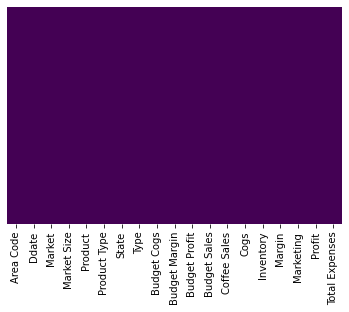

In [16]:
# Next is to check for any null values that could exist
# My process of checking is to the use the heatmap() function from Seaborn
# I then add the dataframe setting it to display only isnull() values
# Then I set the cmap to 'viridis' for my visual benefit
# The purple image will indicate values being detected
# Any yellow tints will indicate any null values being detected

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# If null values have been detected there are 3 ways to approach it
# 1. Ignore it and carry one (not reccommended)
# 2. Drop the variable with the null values, only if it is not playing role in the model
# 3. Use average to predicted the potential values for the null values, then insert the predicted value in place of the nulls

# Fortunately the dataset I am using does not have null values, according to the heatmap, so now I can carry on.

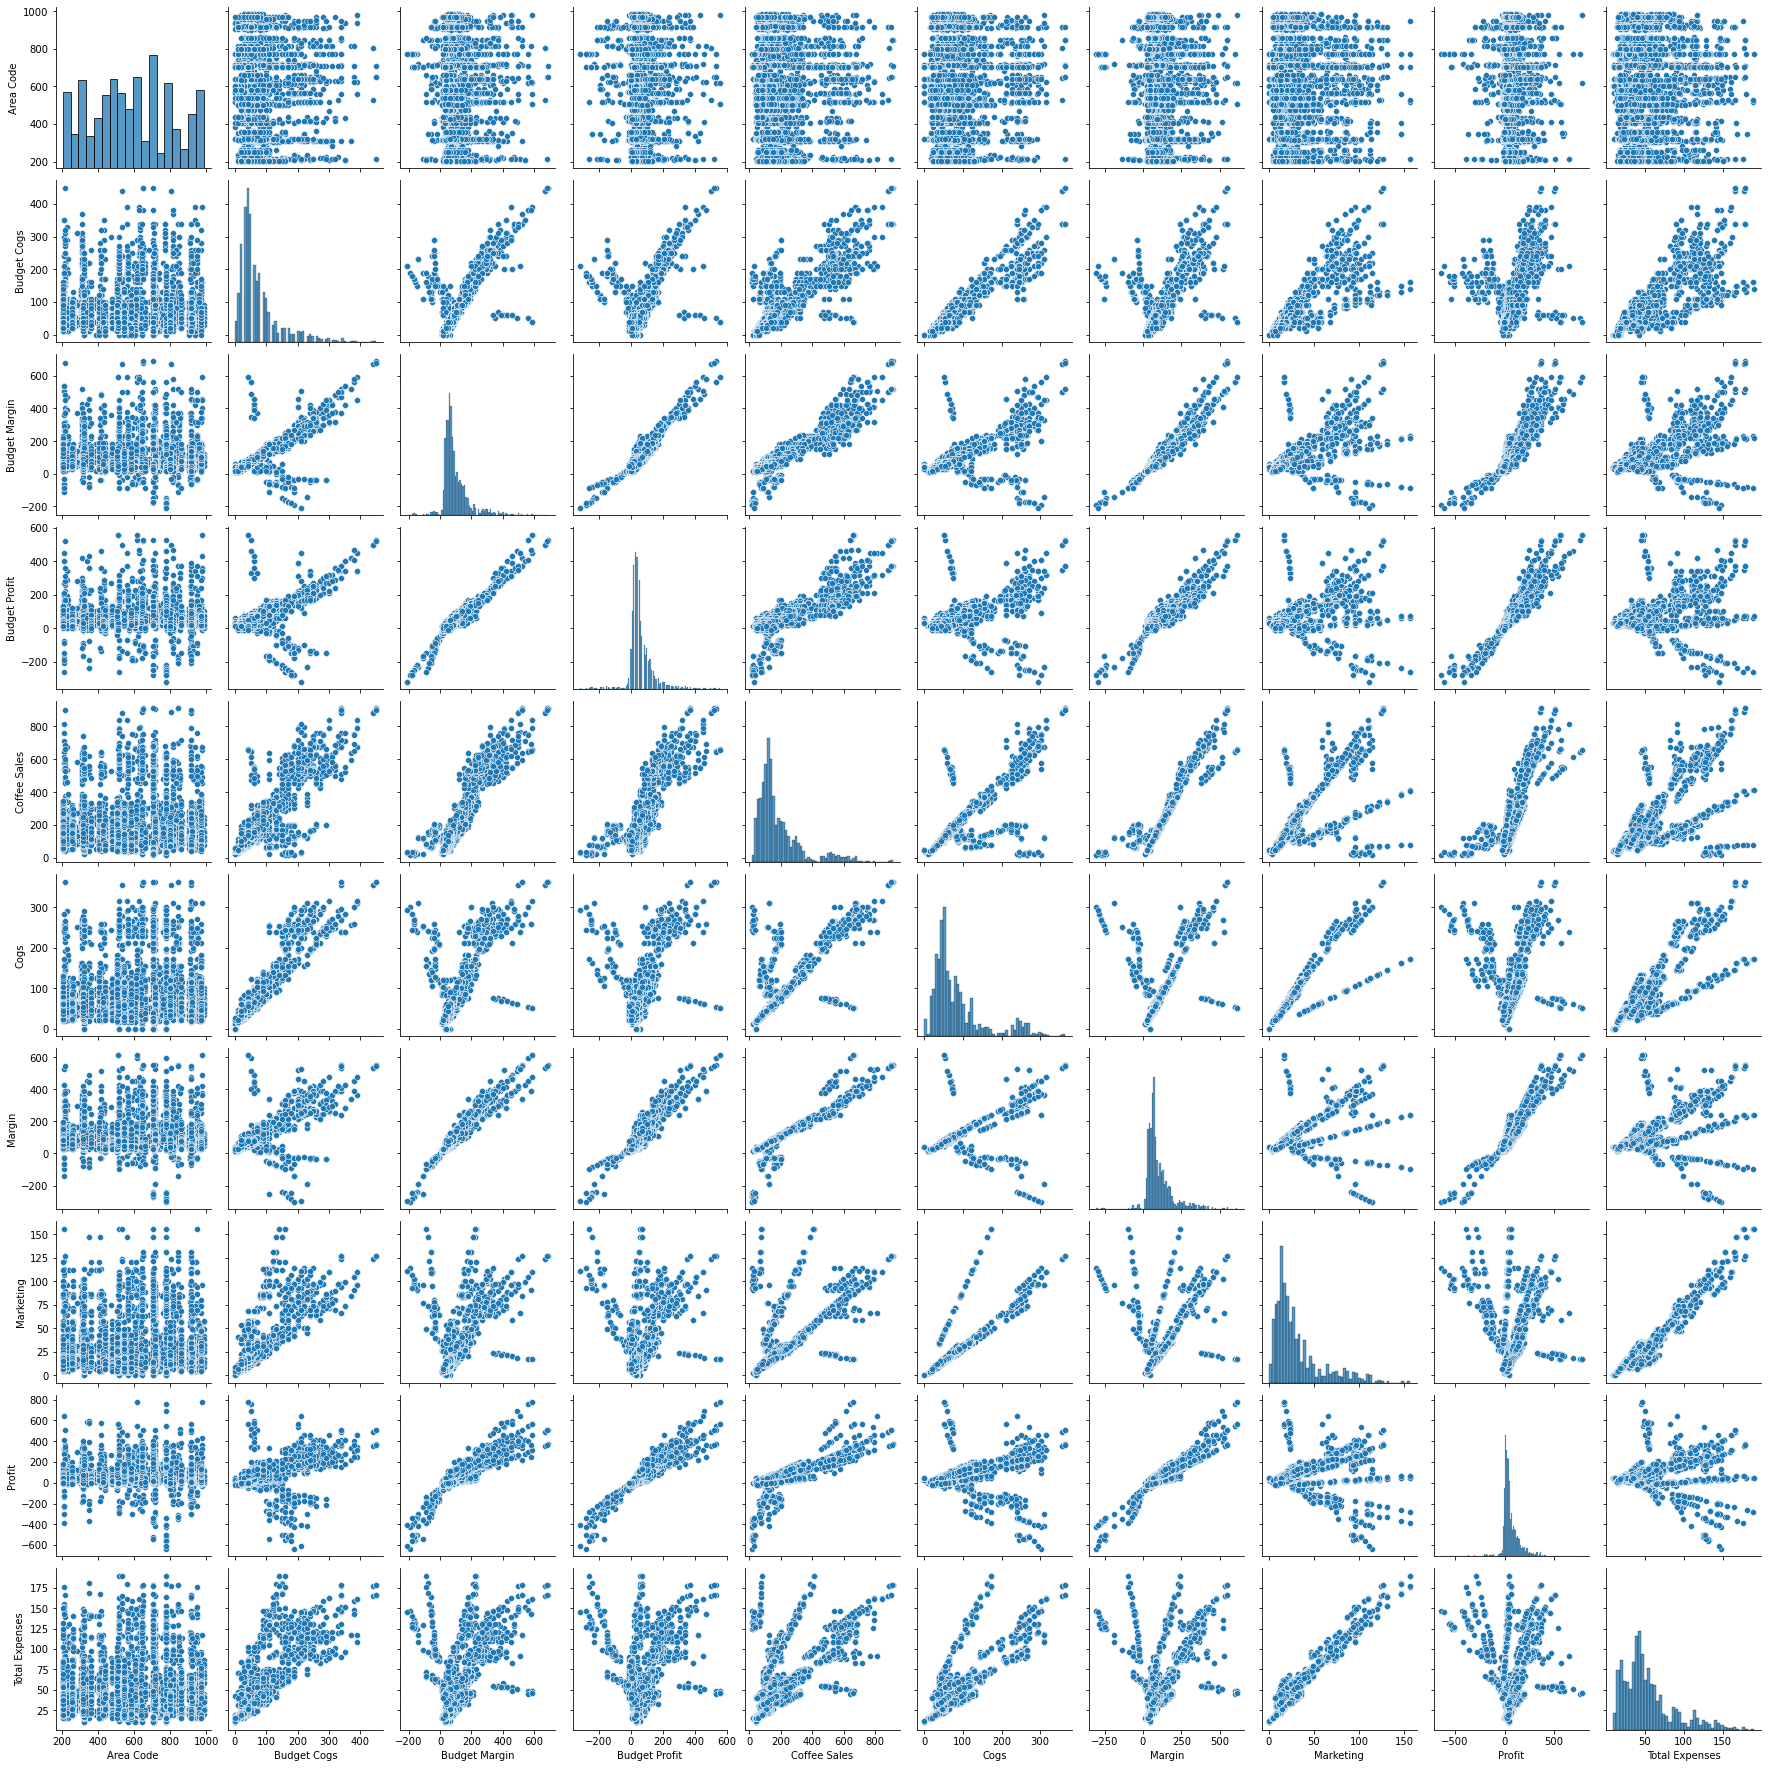

In [18]:
# Next I used the Seaborn pairplot() function to view the relationships between the variables
# This can give us a visual view of which variables have a linear model
sns.pairplot(df)

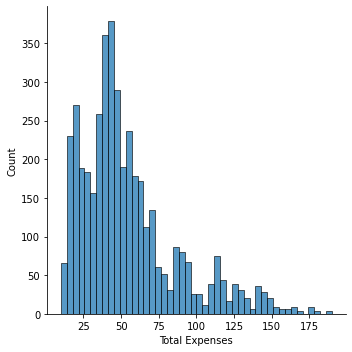

In [19]:
# Next since we are using Linear Regression to predict the Total Expenses 
# It will makes sense to exam the graph of Total Expense itself

sns.displot(df['Total Expenses'])

<AxesSubplot:>

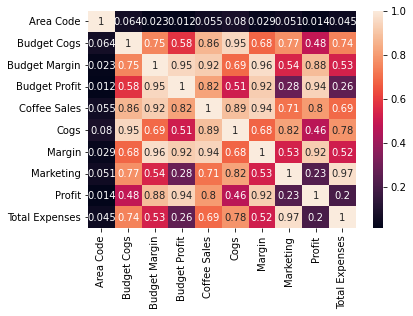

In [20]:
# Next is to find the correlation of all the columns in the dataframe
# All the variables that share a close correlation to our target (Total Expenses) will be our X values
# In this case Budget Cogs, Cogs and Marketing share a close correlation to Total Expenses

sns.heatmap(df.corr(), annot=True)

In [21]:
#For the next 3 cells, I dispalyed a regplot of the individual x values and their relationship wit the target

<AxesSubplot:xlabel='Budget Cogs', ylabel='Total Expenses'>

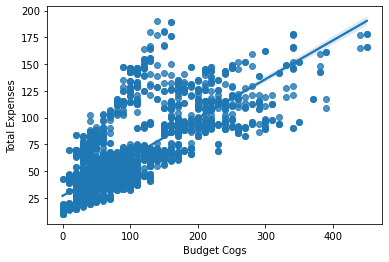

In [22]:
sns.regplot(x='Budget Cogs',y='Total Expenses',data=df)

<AxesSubplot:xlabel='Cogs', ylabel='Total Expenses'>

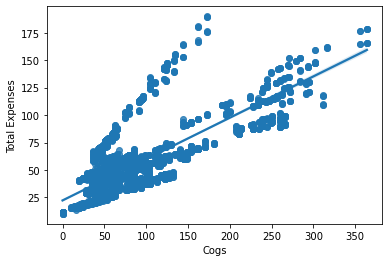

In [23]:
sns.regplot(x='Cogs',y='Total Expenses',data=df)

<AxesSubplot:xlabel='Marketing', ylabel='Total Expenses'>

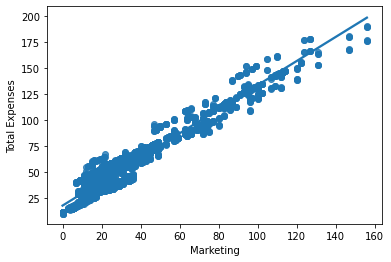

In [24]:
sns.regplot(x='Marketing',y='Total Expenses',data=df)

In [25]:
# With the data clean and our values analyzed, I then started Train and Test process
# First was to store all my X values in a variable named 'X'
# Then used the head() function to display the values  to confirm they were stored correctly

X = df[['Budget Cogs', 'Cogs','Marketing']]
X.head()

,Budget Cogs,Cogs,Marketing
0,100,95,26
1,100,95,26
2,100,95,26
3,100,100,28
4,110,104,29


In [26]:
# After that was to store the target variable Total Expenses in a variable named 'y'

y = df['Total Expenses']
y.head()

0    38
1    38
2    38
3    40
4    40
Name: Total Expenses, dtype: int64

In [27]:
# Now to actually train test and split the data
# This is done my using the sklearn.model selection method to import the train_test_split library
# From there we I called the train_test_split function and fed it the X and y values I captured 
# Also set test_size to 0.33 and random_state to 42 was per standard

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
    )

In [28]:
# Next is the acutal Linear Regression being done
# This is done by calling the sklearn.linear_model method and importing the LinearRegression library with will perfrom the linear regression
# From there I created a variable named 'lr' which will store the fitted training data for the Linear Regression
# fit() will pefrom the actuall training and testing

from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)

In [29]:
# Now lets Evaluate if the model has pefromed correctly

In [30]:
# Once the training and testing was complete, I then printed the Training and Test Score
# This will determine if the process was successful and whether we hit any overfitting or underfitting
# Since both scores came back rather high 93% this tells us the process was a success
# If either score was low it would have been a sign of overfitting or underfitting 
# If that was the case I would have made use of Rigde or Lasso to improve the score

print("Training set score: {:2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))

Training set score: 0.933604
Test set score: 0.934229


In [31]:
# Next I created a predictions variable to hold the predicted values of X
# This was done was using the predict() function on the lr variable and feeding it the X_test data

predictions = lr.predict(X_test)
predictions

array([96.87153457, 28.6803101 , 37.41349993, ..., 52.46146752,
       33.98799786, 48.79304558])

In [32]:
# Then I created another dataframe df2 to present how the Actual test data looks compared to the predicted data

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df2

,Actual,Predicted
718,91,96.871535
3116,42,28.680310
3061,40,37.413500
2552,46,46.627453
120,56,43.809251
...,...,...
1450,26,34.382712
836,96,79.364668
3209,57,52.461468
4136,36,33.987998


In [33]:
# For the next two cells I used both Matpotlib and Seaborn to create scatter graphs to visually show the Linear Regression taking place
# For Seaborn we can even seen the Linear Line

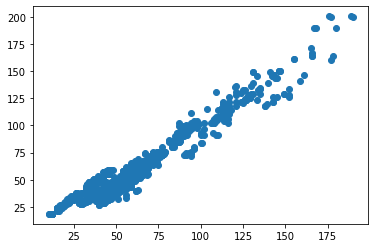

In [34]:
plt.scatter(y_test,predictions)

<AxesSubplot:ylabel='Total Expenses'>

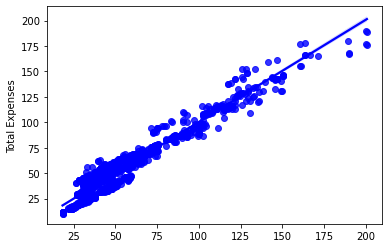

In [35]:
sns.regplot(x=predictions, y= y_test, color="b")

In [36]:
# One final part of the Evaluation is to look at the metrics
# By using sklearn again and importing the metrics library 
# I then use the mean_absolute_error, mean_squared_error, and mean_squared_error sqrt to evaluate the performance

# mean_absolute_error produces the value of 6.9 (or 7 to round up) this tells us the model is 93% correct.

from sklearn import metrics

print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))


6.9765743170005905
69.95048812498315
8.363640841462715


In [37]:
#With Evaluation completed, I then used the model to analyze the intecepts and coefficents to gain deeper knowledge from the data

In [38]:
# For this cell I printed the intercept is the intercept_ method 
# This tells us the point at which the linear line begins to intecerpt the data

print("lr.intercept_:", lr.intercept_)

lr.intercept_: 18.439214401770784


In [39]:
# Then I used the coef_ method to pull the coefficents of each X value

print(lr.coef_)

[ 0.02783304 -0.04048664  1.18401271]


In [40]:
# Finally I used panda's to created a more visually pleasing look for the coefficents 
# Then stored it in a variable named cdf (coefficent dataframe)
# This now tells us at each point any of these values increase by one unit, then the y value (total expenses) is effected by the Coeff values listed
# This now gives me deeper look at how much exactly Total expenses is being affected by the X values
# Empowering the Coffee Chain with deeper knowledge

cdf = pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Budget Cogs,0.027833
Cogs,-0.040487
Marketing,1.184013
